<a href="https://colab.research.google.com/github/cflc/diff_classifier_urop/blob/main/WorkFlowUROP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!git clone  https://github.com/cflc/diff_classifier_urop.git

fatal: destination path 'diff_classifier_urop' already exists and is not an empty directory.


## Optional: Upload the Dir directly.
DO NOT FORGET to change to the correct dir_name in user input

In [26]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd /content/diff_classifier_urop
!ls

/content/diff_classifier_urop
CONTRIBUTING.md  LICENSE    paper.bib  requirements.txt  WorkFlowUROP.ipynb
diff_classifier  Makefile   paper.md   setup.py
doc		 notebooks  README.md  tests.py


In [28]:
#!/usr/bin/env python3
import os
import glob
import numpy as np
import skimage.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import diff_classifier.msd as msd
import diff_classifier.features as ft
import diff_classifier.heatmaps as hm
import diff_classifier.data_analysis as da
import argparse

#USER INPUTS

In [29]:
dir_name = "/content/drive/Othercomputers/My MacBook Pro/Perfused_Chips/2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2"
filename = "2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2"
ds = 512 # desired size for the subdived videos 

######## Video Parameters ########

resolution = 0.8 # pixel/micron
vid_time =  532.16   # in seconds 

In [33]:
tiffname = filename + ".tif"
ft_file = 'features_{}.csv'.format(filename)
msd_file = 'msd_{}.csv'.format(filename)
os.chdir(dir_name)

LOADING VIDEO 

In [31]:
ovideo = sio.imread(tiffname)  # Read tif file
oshape = ovideo.shape  # Shape of Original Video
dshape = (ds, ds)  # Desired shape of smaller videos

umppx = 1 / resolution  # in microns per pixel
fps = oshape[0] / vid_time

Splitting original video into smaller videos sized


In [ ]:
nvideo = np.zeros(oshape, dtype=ovideo.dtype)  # Create an empty array with original's video shape
nvideo[0:oshape[0], 0:oshape[1], :] = ovideo

Create new empty array with desired shape dimensions

In [ ]:
new_image = np.zeros((oshape[0], dshape[0], dshape[1]), dtype=ovideo.dtype)
names = []
division_rows = int(oshape[1] / dshape[0])  # Determine the number of row we want to the divide the new video into
division_cols = int(oshape[2] / dshape[1])  # Determine the number of columns we want to the divide the new video into

for row in range(division_rows):
    for col in range(division_cols):
        new_image = nvideo[:, row * dshape[0]:(row + 1) * dshape[0], col * dshape[1]:(col + 1) * dshape[1]]
        current = tiffname.split('.tif')[0] + '_%s_%s.tif' % (row, col)
        sio.imsave(current, new_image)
        names.append(current)
names

['2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_1.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_1_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_1_1.tif']

Loading Trajectory Files

In [ ]:
files = glob.glob('*traj*')  # get rename the trajectory .csv files
files
files = ["traj_0_0.csv'"]

Defining list of all small videos to be quantified (calculating msds and features)

In [ ]:
length = oshape[0]  # number of frames
for i in range(0, division_rows):
    for j in range(0, division_cols):
        names.append('{}_{}_{}.tif'.format(filename, i, j))
names

['2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_1.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_1_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_1_1.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_1.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_1_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_1_1.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_0.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechdissect_pgright_+1umRED-PEGPNPs_perfused!!_pt2_0_1.tif',
 '2022-09-06_HUVEC+FB_diamondchip3_mechd

Calculating MSDs and features for the videos that have been tracked. This uses the Traj .csv files and generates an msd and features .csv file for the videos being quantified. It uses the multiple small vid Traj .csv files to generate a single msd and features .csv file. Essentially, this runs the kn.assemble_msds() function

## Creating MSD File

In [ ]:
counter = 0
286
merged = False
for name in names:
    try:
        # Get the numbering of the sectioned videos ####
        row = int(name.split(filename)[1].split('.')[0].split('_')[1])
        col = int(name.split(filename)[1].split('.')[0].split('_')[2])

        local_name = "{}_{}_{}.csv".format("traj", row, col)

        to_add = pd.read_csv(local_name)  # Gets all the values from the tajectory file

        # Mine have an extra 3 rows of non important information so we get rid of the first three rows
        to_add = to_add.iloc[3:]

        # Deleting unecessary columns in the CSV file that ImageJ(FIJI) outputs #####
        del to_add['LABEL']
        del to_add['POSITION_Z']
        del to_add['POSITION_T']
        del to_add['RADIUS']
        del to_add['VISIBILITY']
        del to_add['MANUAL_SPOT_COLOR']
        del to_add['MEDIAN_INTENSITY_CH1']
        del to_add['MIN_INTENSITY_CH1']
        del to_add['MAX_INTENSITY_CH1']
        del to_add['TOTAL_INTENSITY_CH1']
        del to_add['STD_INTENSITY_CH1']
        del to_add['CONTRAST_CH1']
        del to_add['ID']  # Not really used by msds2 file so I also delete it

        # Get the names and format in the one taken by the MSDS2 function
        to_add = to_add.rename(columns={'TRACK_ID': 'Track_ID', 'QUALITY': 'Quality', 'FRAME': 'Frame',
                                        'POSITION_X': 'X', 'POSITION_Y': 'Y',
                                        'MEAN_INTENSITY_CH1': 'Mean_Intensity', 'SNR_CH1': 'SN_Ratio'})

        to_add.sort_values(['Track_ID', 'Frame'], ascending=[1, 1])
        to_add = to_add.astype('float64')  # Declaring the values to have decimal points

        counter = 0
        partids = to_add.Track_ID.unique()  # Getting all the unique TRACK_IDs: Unique particles
        for partid in partids:
            to_add.loc[to_add.Track_ID == partid, 'Track_ID'] = counter
            counter = counter + 1

        # Taking into account that we are in a different row and column of the original video
        # Since we divided the videos the X and Y positions are offset and this takes care of that

        to_add['X'] = to_add['X'] + dshape[0] * col
        to_add['Y'] = dshape[1] - to_add['Y'] + dshape[1] * (division_rows - 1 - row)

        # Cheking if it is the first video, if so we need to create merge array
        if counter == 0 or type(merged) == bool:
            print('counter is 0')
            merged = msd.all_msds2(to_add)

        # If merged has already been created we can concatenate the next array
        else:
            # Since each particle is different of the different videos we need to take that into account.
            # eg Particle with Track ID 1 from video 1_1 is not the same as Particle with Track ID 1 from
            # video 1_2, so we shift the Track IDs
            if merged.shape[0] > 0:
                print('merged.shape is greater than 0')
                to_add['Track_ID'] = to_add['Track_ID'] + max(merged['Track_ID']) + 1
            else:
                print('else')
                to_add['Track_ID'] = to_add['Track_ID']

            print('concat')
            msds2 = msd.all_msds2(to_add)
            merged = pd.concat([merged, msds2], axis=0, join='outer')

        counter = counter + 1
        print('Done calculating MSDs for row {} and col {}'.format(row, col))

    except pd.errors.EmptyDataError:

        print('Found empty file : {}'.format(name))

print("Finished Merging")

counter is 0
Done calculating MSDs for row 0 and col 0
merged.shape is greater than 0
concat
Done calculating MSDs for row 0 and col 1
merged.shape is greater than 0
concat
Done calculating MSDs for row 1 and col 0
merged.shape is greater than 0
concat
Done calculating MSDs for row 1 and col 1
merged.shape is greater than 0
concat
Done calculating MSDs for row 0 and col 0
merged.shape is greater than 0
concat
Done calculating MSDs for row 0 and col 1
merged.shape is greater than 0
concat
Done calculating MSDs for row 1 and col 0
merged.shape is greater than 0
concat
Done calculating MSDs for row 1 and col 1
merged.shape is greater than 0
concat
Done calculating MSDs for row 0 and col 0
merged.shape is greater than 0
concat
Done calculating MSDs for row 0 and col 1
merged.shape is greater than 0
concat
Done calculating MSDs for row 1 and col 0
merged.shape is greater than 0
concat
Done calculating MSDs for row 1 and col 1
Finished Merging


Saving features and msd files 

In [ ]:
merged.to_csv(msd_file)  # Create CSV file from the array containing the MSDs
merged_ft = ft.calculate_features(merged)  # Create Feature file
merged_ft.to_csv(ft_file)   # Save features in to a CSV

/content/diff_classifier_urop/diff_classifier/features.py:512: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width / height
/content/diff_classifier_urop/diff_classifier/features.py:854: RuntimeWarning: Mean of empty slice
  datai['Mean ' + col][bitesize.index] = np.nanmean(bitesize[col])
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


## Get feature files from the velocity files 

A data frame containing:
  - Velocity calculated by ImageJ
  - Confinement ratio
  - total Distance Traveled
  - Diffsuin Calculated Velocity
    - Mean D_fit
    - Mean Deff1
    - Mean Deff2

In [ ]:
sv = da.features_from_velocity(names, filename, umppx, fps, vid_time)

ValueError: ignored

## Plotting Trajectories

Plotted Matrigel100nmYG trajectories successfully.


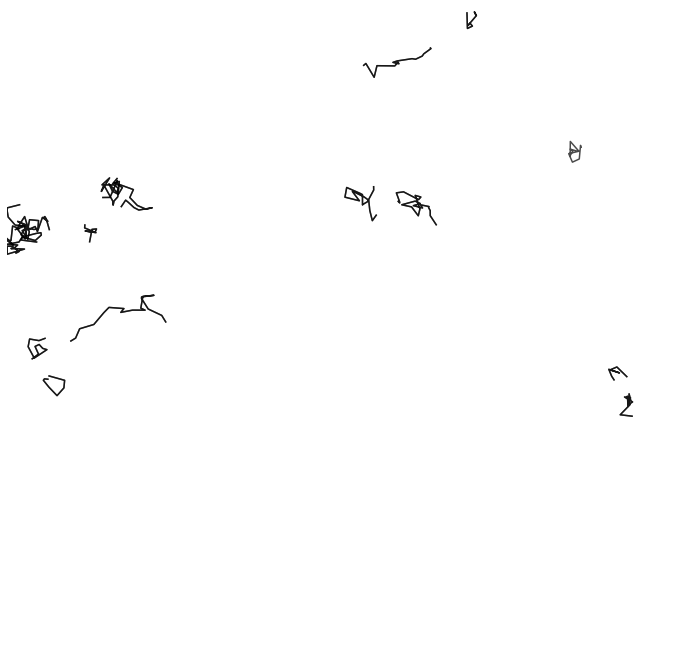

In [ ]:
hm.plot_trajectories(filename, resolution=dshape[1], rows=division_rows, cols=division_cols,
                         upload=False, figsize=(12, 12))

## Plotting Mean Square

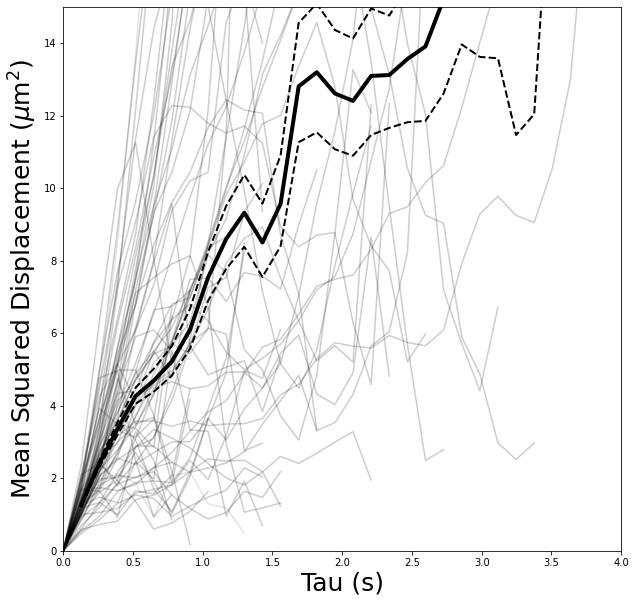

In [ ]:
geomean, geoSEM = hm.plot_individual_msds(filename, x_range=4, y_range=15, umppx=umppx, fps=fps)

## Plots pre-calculated precision-weighted averages of MSD datasets calculated from precision_averaging

The parameters for this function are prefix name, resolution in umppx and the backup frame number


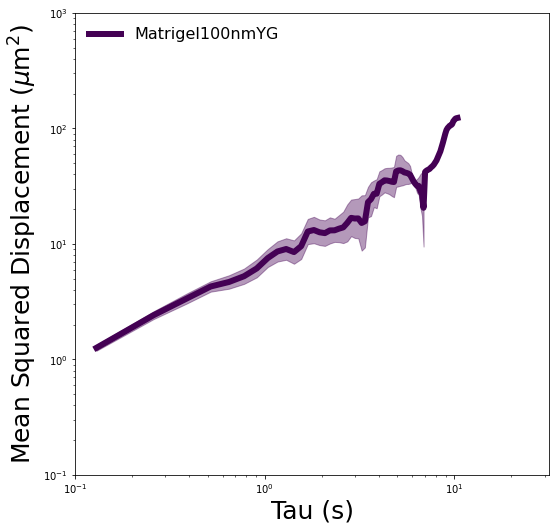

In [ ]:
geo_stder = {}
geomean = {}

compared = [filename]
for fl in compared:
    geomean_array, geo_stder_array = msd.geomean_msdisp(filename, umppx=umppx)

    geo_stder[fl] = geo_stder_array
    geomean[fl] = geomean_array

weights, w_holder = msd.precision_weight(compared, geo_stder)

geodata = msd.precision_averaging(compared, geomean, geo_stder, weights)

msd.plot_all_experiments(compared, yrange=(10 ** -1, 10 ** 3), fps=fps, xrange=(10 ** -1, 10 ** 1.5),
                          outfile='precision-weighted averages of MSD datasets.png', exponential=True, labels=None,
                          log=True)
plt.savefig('precision-weighted averages of MSD datasets.png', bbox_inches='tight')


## Plotting the Histogram

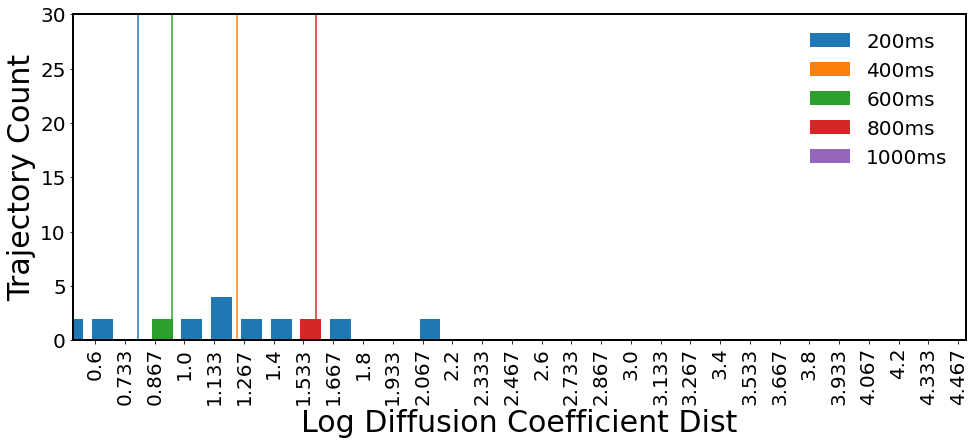

In [ ]:
hm.plot_histogram(filename, xlabel='Log Diffusion Coefficient Dist', ylabel='Trajectory Count',
                      fps=fps, umppx=umppx, frames=oshape[0], y_range=30, frame_interval=20, frame_range=100,
                      analysis='log', theta='D')

## Plotting Boxplot

Speed and Velocity


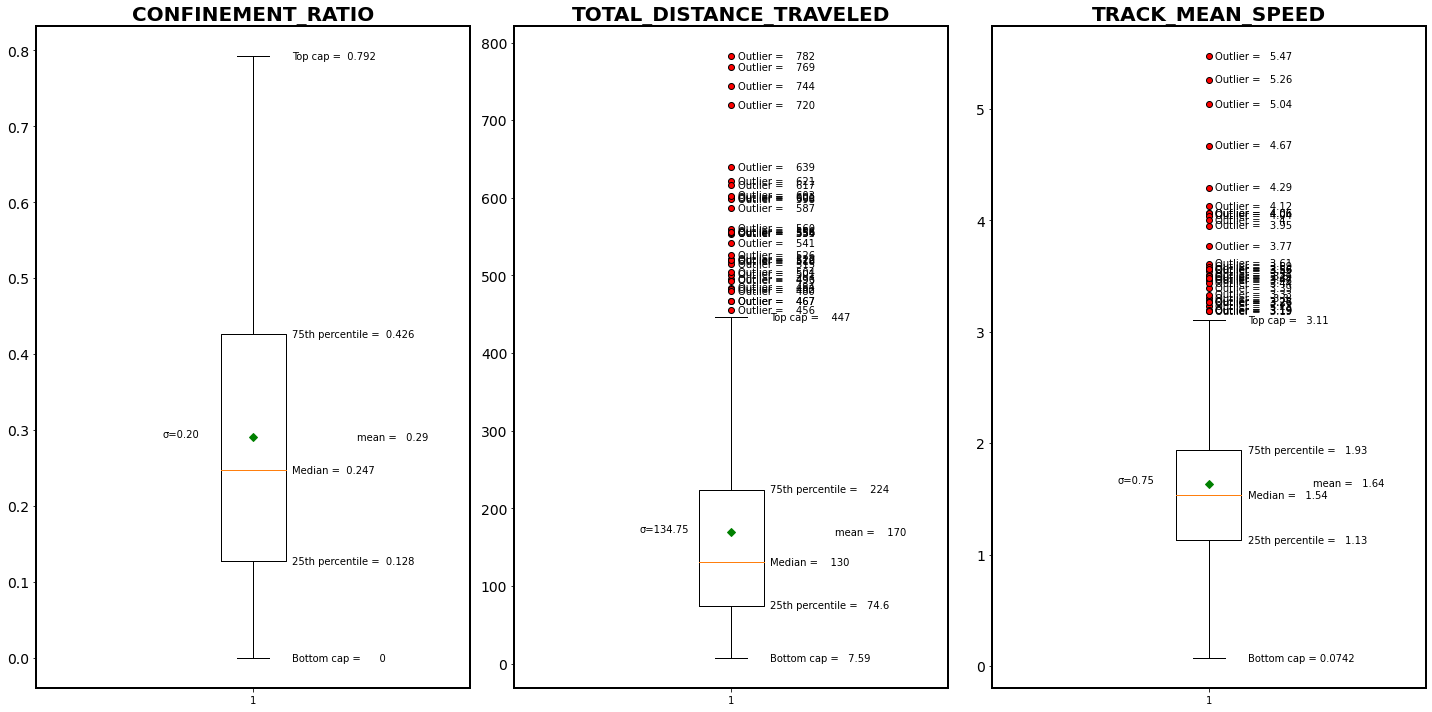

{'CONFINEMENT_RATIO': {'median': 0.24705567808053758,
  'pc25': 0.12766955707054728,
  'pc75': 0.42590435052797565,
  'mean': 0.2904039130906975,
  'capbottom': 0.0,
  'captop': 0.791997233372856,
  'std': 0.19769122599116376},
 'TOTAL_DISTANCE_TRAVELED': {'median': 130.41324150780954,
  'pc25': 74.6298667701893,
  'pc75': 224.18718808674538,
  'mean': 169.92170177833938,
  'capbottom': 7.587004430260153,
  'captop': 446.5527401487896,
  'std': 134.7473719847077},
 'TRACK_MEAN_SPEED': {'median': 1.5353166746041786,
  'pc25': 1.130344764297395,
  'pc75': 1.9344204586368001,
  'mean': 1.6371885208805639,
  'capbottom': 0.0741580069512171,
  'captop': 3.1072685459598723,
  'std': 0.7463177321059675}}

In [65]:
parameter_list = ["TRACK_MEAN_SPEED", "CONFINEMENT_RATIO", "TOTAL_DISTANCE_TRAVELED"]
parameter_type = "SV"
da.boxplot_feature(filename, col_list=parameter_list, file=parameter_type, umppx=umppx, fps=fps, vid_time=vid_time)

# OLD CODE

In [ ]:
#os.chdir('/Users/brendanbutler/Desktop/Nance Lab/Data/diff_classifier/notebooks/development/MPT_Data/Prelim Data/NT 4DIV Traj csv')
ires = (512, 512)
frames = 286
rows = 4
counter = 0
for name in names:
    try:
        row = int(name.split(filename)[1].split('.')[0].split('_')[1])
        col = int(name.split(filename)[1].split('.')[0].split('_')[2])

        traj_file = "{}_{}_{}.csv".format("traj", row, col)
        local_name = traj_file

        if counter == 0:
            to_add = pd.read_csv(local_name)
            to_add = to_add.iloc[3:]
            del to_add['LABEL']
            del to_add['POSITION_Z']
            del to_add['POSITION_T']
            del to_add['RADIUS']
            del to_add['VISIBILITY']
            del to_add['MANUAL_SPOT_COLOR']
            del to_add['MEDIAN_INTENSITY_CH1']
            del to_add['MIN_INTENSITY_CH1']
            del to_add['MAX_INTENSITY_CH1']
            del to_add['TOTAL_INTENSITY_CH1']
            del to_add['STD_INTENSITY_CH1']
            del to_add['CONTRAST_CH1']
            del to_add['ID']  # Not really used by msds2 file so I also delete it

            # Get the names and format in the one taken by the MSDS2 function
            to_add = to_add.rename(columns={'TRACK_ID': 'Track_ID', 'QUALITY': 'Quality', 'FRAME': 'Frame',
                                            'POSITION_X': 'X', 'POSITION_Y': 'Y',
                                            'MEAN_INTENSITY_CH1': 'Mean_Intensity', 'SNR_CH1': 'SN_Ratio'})

            to_add.sort_values(['Track_ID', 'Frame'], ascending=[1,1])
            to_add = to_add.astype('float64')

            partids = to_add.Track_ID.unique()
            counter = 0
            for partid in partids:
                to_add.loc[to_add.Track_ID == partid, 'Track_ID'] = counter
                counter = counter +1
            to_add['X'] = to_add['X'] + ires[0]*col
            to_add['Y'] = ires[1]-to_add['Y']+ires[1]*(rows-1-row)
            merged = msd.all_msds2(to_add)
            print("Finished with row 0 col 0")

        else:
        
            if merged.shape[0] > 0:
                to_add = pd.read_csv(local_name)
                to_add = to_add.iloc[3:]
                del to_add['LABEL']
                del to_add['POSITION_Z']
                del to_add['POSITION_T']
                del to_add['RADIUS']
                del to_add['VISIBILITY']
                del to_add['MANUAL_SPOT_COLOR']
                del to_add['MEDIAN_INTENSITY_CH1']
                del to_add['MIN_INTENSITY_CH1']
                del to_add['MAX_INTENSITY_CH1']
                del to_add['TOTAL_INTENSITY_CH1']
                del to_add['STD_INTENSITY_CH1']
                del to_add['CONTRAST_CH1']
                del to_add['ID']  # Not really used by msds2 file so I also delete it

                # Get the names and format in the one taken by the MSDS2 function
                to_add = to_add.rename(columns={'TRACK_ID': 'Track_ID', 'QUALITY': 'Quality', 'FRAME': 'Frame',
                                                'POSITION_X': 'X', 'POSITION_Y': 'Y',
                                                'MEAN_INTENSITY_CH1': 'Mean_Intensity', 'SNR_CH1': 'SN_Ratio'})
                to_add.sort_values(['Track_ID', 'Frame'], ascending=[1,1])
                to_add = to_add.astype('float64')

                partids = to_add.Track_ID.unique()
                counter = 0
                for partid in partids:
                    to_add.loc[to_add.Track_ID == partid, 'Track_ID'] = counter
                    counter = counter +1
                to_add['X'] = to_add['X'] + ires[0]*col
                to_add['Y'] = ires[1] - to_add['Y'] + ires[1]*(rows-1-row)
                to_add['Track_ID'] = to_add['Track_ID'] + max(merged['Track_ID']) +1
            
            else:
                to_add = pd.read_csv(local_name)
                to_add = to_add.iloc[3:]
                del to_add['LABEL']
                del to_add['POSITION_Z']
                del to_add['POSITION_T']
                del to_add['RADIUS']
                del to_add['VISIBILITY']
                del to_add['MANUAL_SPOT_COLOR']
                del to_add['MEDIAN_INTENSITY_CH1']
                del to_add['MIN_INTENSITY_CH1']
                del to_add['MAX_INTENSITY_CH1']
                del to_add['TOTAL_INTENSITY_CH1']
                del to_add['STD_INTENSITY_CH1']
                del to_add['CONTRAST_CH1']
                del to_add['ID']  # Not really used by msds2 file so I also delete it

                # Get the names and format in the one taken by the MSDS2 function
                to_add = to_add.rename(columns={'TRACK_ID': 'Track_ID', 'QUALITY': 'Quality', 'FRAME': 'Frame',
                                'POSITION_X': 'X', 'POSITION_Y': 'Y',
                                'MEAN_INTENSITY_CH1': 'Mean_Intensity', 'SNR_CH1': 'SN_Ratio'})
                to_add.sort_values(['Track_ID', 'Frame'], ascending=[1,1])
                to_add = to_add.astype('float64')

                partids = to_add.Track_ID.unique()
                counter = 0
                for partid in partids:
                    to_add.loc[to_add.Track_ID == partid, 'Track_ID'] = counter
                    counter = counter +1
                to_add['X'] = to_add['X'] + ires[0]*col
                to_add['Y'] = ires[1] - to_add['Y'] + ires[1]*(rows-1-row)
                to_add['Track_ID'] = to_add['Track_ID']
            
            merged = merged.append(msd.all_msds2(to_add))
            print('Done calculating MSDs for row {} and col {}'.format(row, col))
    
        counter = counter +1
    
        merged.to_csv(msd_file)
        merged_ft = ft.calculate_features(merged)
        merged_ft.to_csv(ft_file)
    
    except pd.errors.EmptyDataError:
        print('Found empty file : {}'.format(name))

